In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import norm
from pandas_datareader import DataReader
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
current = datetime.now()

### Data Fetching

In [3]:
train_start = datetime(current.year-3, current.month, current.day)
train_end = datetime(current.year-1, current.month, current.day)
train_data = DataReader('MSFT', 'yahoo', train_start, train_end)
print(train_start)
print(train_end)
train_data

2016-11-26 00:00:00
2018-11-26 00:00:00


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-28,61.020000,60.209999,60.340000,60.610001,20732600.0,57.428230
2016-11-29,61.410000,60.520000,60.650002,61.090000,22366700.0,57.883026
2016-11-30,61.180000,60.220001,60.860001,60.259998,34655400.0,57.096596
2016-12-01,60.150002,58.939999,60.110001,59.200001,34542100.0,56.092239
2016-12-02,59.470001,58.799999,59.080002,59.250000,25515700.0,56.139614
...,...,...,...,...,...,...
2018-11-20,102.970001,99.349998,101.800003,101.709999,64052500.0,100.228027
2018-11-21,104.430000,102.239998,103.599998,103.110001,28130600.0,101.607620
2018-11-23,103.809998,102.000000,102.169998,103.070000,13823100.0,101.568207


In [4]:
test_start = datetime(current.year-1, current.month, current.day+1)
test_end = current
test_data = DataReader('MSFT', 'yahoo', test_start, test_end)
print(test_start)
print(test_end)
test_data

2018-11-27 00:00:00
2019-11-26 00:57:20.895593


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-27,107.330002,105.360001,106.269997,107.139999,29124500.0,105.578896
2018-11-28,111.330002,107.860001,107.889999,111.120003,46788500.0,109.500916
2018-11-29,111.120003,109.029999,110.330002,110.190002,28123200.0,108.584465
2018-11-30,110.970001,109.360001,110.699997,110.889999,33665600.0,109.274261
2018-12-03,113.419998,110.730003,113.000000,112.089996,34732800.0,110.456779
...,...,...,...,...,...,...
2019-11-19,151.330002,150.199997,150.880005,150.389999,23935700.0,149.879990
2019-11-20,150.839996,148.460007,150.309998,149.619995,25696800.0,149.619995
2019-11-21,149.800003,148.500000,149.399994,149.479996,18576100.0,149.479996


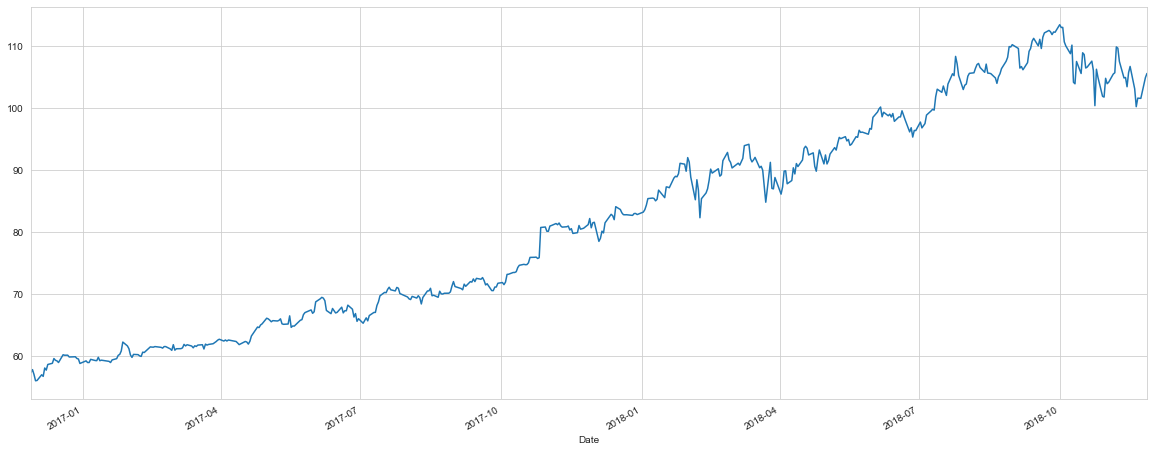

In [5]:
train_data['Adj Close'].plot(figsize=(20, 8))

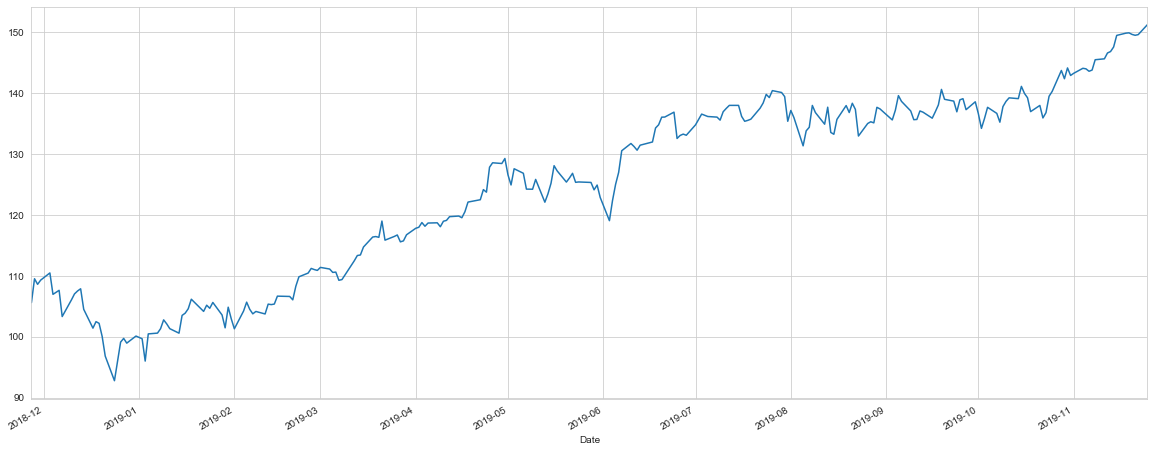

In [6]:
test_data['Adj Close'].plot(figsize=(20, 8))

In [7]:
data = test_data['Adj Close']

### taking log (normalizing data)

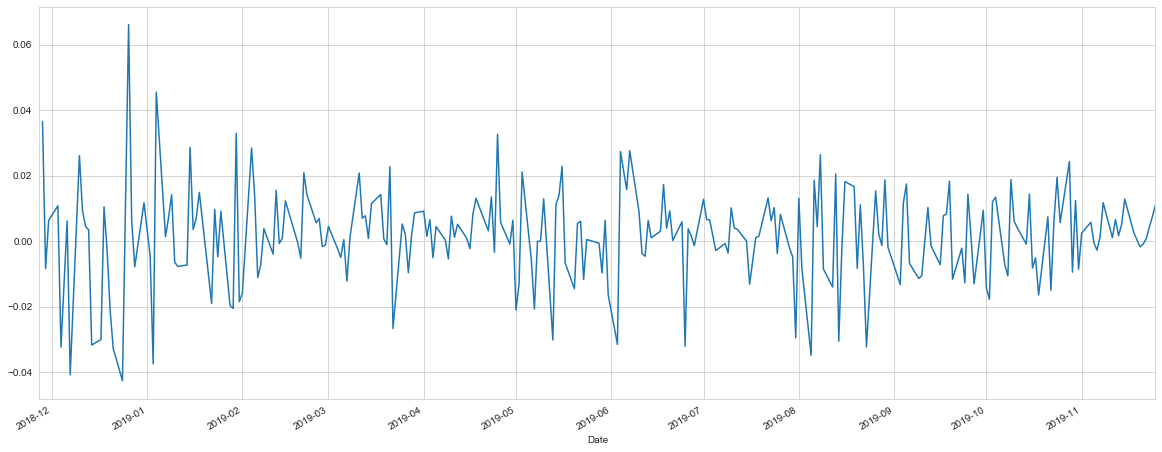

In [8]:
log_return = np.log(1+ data.pct_change())
log_return.plot(figsize=(20, 8))

<img src='Resources/equatio.gif'>
<img src='Resources/eq2.png'>

### Mean, Standard deviation, Variance

In [9]:
u = log_return.mean()
var = log_return.var()
stdev = log_return.std()
drift = u - (0.5*var)

### Hyperparameter and Brownian Motion

In [10]:
TIME_INTERVAL = 300 # Number of days
ITERATION = 50 # Number of future predictions
daily_return = np.exp(drift + stdev * norm.ppf(np.random.rand(TIME_INTERVAL, ITERATION)))
daily_return

array([[0.99165932, 1.00107754, 1.00259288, ..., 1.02021875, 1.00172304,
        0.98812038],
       [1.00694699, 1.00950621, 0.98973202, ..., 0.98649156, 0.9951294 ,
        0.99430555],
       [0.9965892 , 1.02019604, 0.99509756, ..., 1.01565234, 1.00374147,
        1.00014085],
       ...,
       [1.04269971, 1.00150148, 0.99778794, ..., 0.99750947, 0.98623683,
        1.01806479],
       [1.00757385, 0.98253152, 0.98824019, ..., 0.99058043, 1.00525906,
        0.99874425],
       [0.99340951, 1.00224667, 1.00137389, ..., 1.00797362, 1.01222811,
        0.99741912]])

In [11]:
price_list = np.zeros_like(daily_return)
price_list[0] = data.iloc[0]

for i in range(1, TIME_INTERVAL):
    price_list[i] = price_list[i-1] * daily_return[i]
price_list

array([[105.57889557, 105.57889557, 105.57889557, ..., 105.57889557,
        105.57889557, 105.57889557],
       [106.31235141, 106.58255096, 104.49481375, ..., 104.15268983,
        105.06466297, 104.9776814 ],
       [105.94974136, 108.73509641, 103.98253444, ..., 105.78292272,
        105.45775952, 104.99246731],
       ...,
       [175.28301572, 181.93498337, 252.82873881, ..., 193.63212733,
        184.84844001, 198.0677612 ],
       [176.6105835 , 178.7568551 , 249.85552049, ..., 191.80819627,
        185.82056901, 197.81903737],
       [175.44663384, 179.15846295, 250.19879445, ..., 193.33760158,
        188.09280395, 197.30849106]])

In [12]:
y_label = [] 
for i in test_data['Adj Close'].index.to_list():
    y_label.append(str(i)[:-9])

### Data Visuliazation

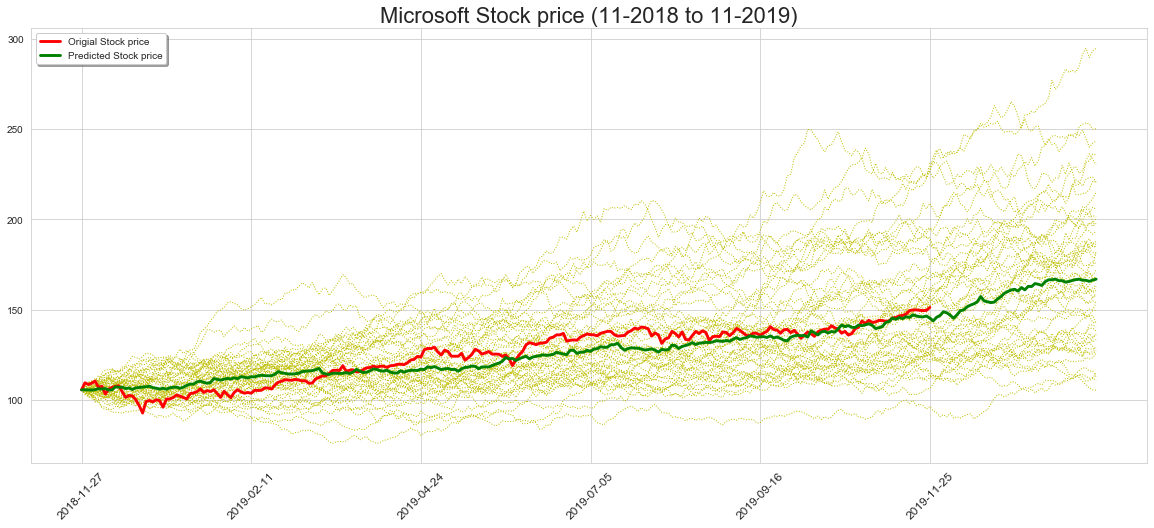

In [13]:
plt.figure(figsize=(20,8))
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        
plt.title('Microsoft Stock price (11-2018 to 11-2019)', fontsize=22)
plt.xticks(range(0, test_data['Adj Close'].shape[0], 50), y_label[::50] ,rotation=45, fontsize=12)    
plt.plot(price_list, 'y:', linewidth=1)
plt.plot(test_data['Adj Close'].to_list(), 'r', label='Origial Stock price', linewidth=2.9)
plt.plot(np.median(price_list, axis = 1), 'g', label='Predicted Stock price', linewidth=2.9)
plt.legend(loc='upper left', ncol=1, shadow=True)
plt.savefig('msftstock.png')

### Evaluation

In [16]:
def calculateDifference(original, predicted):
    difference = abs(original - predicted)
    percentage_difference = difference / predicted # Percent by element.
    mean_pct_diff = np.mean(percentage_difference*100) # Average percentage over all elements.
    print('{} % differece between original and predicted stock prices'.format(round(mean_pct_diff,2)))

In [17]:
calculateDifference(test_data['Adj Close'].to_list(), np.median(price_list, axis=1)[:len(data)])

4.21 % differece between original and predicted stock prices
